# Chapter Eight - Machine Learning

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../../../optimus")

In [4]:
from optimus import Optimus
op = Optimus("pandas")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LuisA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Train-test split procedure

In [5]:
df = op.load.file("Meteorite_Landings.csv")
df

name 1 (object),id 2 (int64),nametype 3 (object),recclass 4 (object),mass (g) 5 (object),fall 6 (object),year 7 (object),reclat 8 (object),reclong 9 (object),GeoLocation 10 (object)
Aachen,1,Valid,L5,21,Fell,01/01/1880⋅12:00:00⋅AM,50.775000,6.083330,"(50.775000,⋅6.083330)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951⋅12:00:00⋅AM,56.183330,10.233330,"(56.183330,⋅10.233330)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952⋅12:00:00⋅AM,54.216670,-113.000000,"(54.216670,⋅-113.000000)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976⋅12:00:00⋅AM,16.883330,-99.900000,"(16.883330,⋅-99.900000)"
Achiras,370,Valid,L6,780,Fell,01/01/1902⋅12:00:00⋅AM,-33.166670,-64.950000,"(-33.166670,⋅-64.950000)"
Adhi⋅Kot,379,Valid,EH4,4239,Fell,01/01/1919⋅12:00:00⋅AM,32.100000,71.800000,"(32.100000,⋅71.800000)"
Adzhi-Bogdo⋅(stone),390,Valid,LL3-6,910,Fell,01/01/1949⋅12:00:00⋅AM,44.833330,95.166670,"(44.833330,⋅95.166670)"
Agen,392,Valid,H5,30000,Fell,01/01/1814⋅12:00:00⋅AM,44.216670,0.616670,"(44.216670,⋅0.616670)"
Aguada,398,Valid,L6,1620,Fell,01/01/1930⋅12:00:00⋅AM,-31.600000,-65.233330,"(-31.600000,⋅-65.233330)"
Aguila⋅Blanca,417,Valid,L,1440,Fell,01/01/1920⋅12:00:00⋅AM,-30.866670,-64.550000,"(-30.866670,⋅-64.550000)"


Using a test size of `0.2`

In [6]:
df.ml.linear_regression(['reclat','reclong'], 'mass (g)', test_size=0.2).evaluate()

{'accuracy': 0.0008204248692512683, 'standard deviation': 0.003991363792386832}

### Linear Regression

In [7]:
import numpy as np 
import random
size = 10000 

data = { 
    'length':[round(random.uniform(1,2),1) for i in range(size)],  
    'width': [round(random.uniform(1,1.5),1) for i in range(size)],  
    'height': [random.randint(20,50) for i in range(size)], 
    'type': [random.randint(0,1) for i in range(size)] 
} 
  
df = op.create.dataframe(data).repartition(4).execute()
df['d_weight'] = df['height'] * df['width'] * df['length'] * [random.uniform(1,1) for i in range(size)] 
df = df.cols.round('d_weight',1)
df

length 1 (float64),width 2 (float64),height 3 (int64),type 4 (int64),d_weight 5 (float64)
1.8,1.1,47,1,93.1
1.2,1.2,41,0,59.0
1.5,1.4,26,1,54.6
1.7,1.0,48,1,81.6
1.4,1.1,33,1,50.8
1.5,1.2,29,1,52.2
1.6,1.5,49,1,117.6
2.0,1.4,34,0,95.2
1.5,1.1,29,1,47.8
1.9,1.2,48,1,109.4


In [8]:
lm = df.ml.linear_regression('height','d_weight', test_size=0.2,fit_intercept=False) 

In [9]:
lm.predict(36)

[67.33176459023025]

In [10]:
lm.evaluate()

{'accuracy': 0.5365156440432082, 'standard deviation': 0.0056056024357179655}

In [11]:
lm.intercept()

0.0

In [12]:
lm.coef() 

[1.8703267941730624]

In [13]:
lm = df.ml.linear_regression('height','d_weight', test_size=0.3) 
lm.scores()

{'neg_mean_absolute_error': [-12.276187033814281,
  -12.209330071992435,
  -12.44355708282776,
  -12.431631331625756,
  -12.207531175952365],
 'neg_mean_squared_error': [-236.3525511972909,
  -232.14253438822143,
  -246.94657688651216,
  -242.11146535407616,
  -232.45636919429404],
 'neg_root_mean_squared_error': [-15.373761777694192,
  -15.236224413817927,
  -15.714533937935041,
  -15.559931405828117,
  -15.246519904368146],
 'r2': [0.5184995119664715,
  0.5287303211009444,
  0.53104248862032,
  0.5476402454339813,
  0.5464646994566114]}

In [14]:
lm = df.ml.linear_regression(['length','width','height'],'d_weight', test_size=0.2,fit_intercept=False)
lm.predict([[1.4,1.38,25]])

[49.03362839186878]

In [15]:
lm.coef()

[22.934002521358877, -12.45659874157176, 1.3646452450134152]

In [16]:
lm.evaluate()

{'accuracy': 0.674129497307842, 'standard deviation': 0.0034373987490070746}

### Logistic Regression

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
df = op.create.dataframe(df)
df

sepal length (cm) 1 (float64),sepal width (cm) 2 (float64),petal length (cm) 3 (float64),petal width (cm) 4 (float64),target 5 (float64)
5.1,3.5,1.4,0.2,0.0
4.9,3.0,1.4,0.2,0.0
4.7,3.2,1.3,0.2,0.0
4.6,3.1,1.5,0.2,0.0
5.0,3.6,1.4,0.2,0.0
5.4,3.9,1.7,0.4,0.0
4.6,3.4,1.4,0.3,0.0
5.0,3.4,1.5,0.2,0.0
4.4,2.9,1.4,0.2,0.0
4.9,3.1,1.5,0.1,0.0


In [18]:
df.cols.select(['sepal length (cm)', 'sepal width (cm)', 'target'])

sepal length (cm) 1 (float64),sepal width (cm) 2 (float64),target 3 (float64)
5.1,3.5,0.0
4.9,3.0,0.0
4.7,3.2,0.0
4.6,3.1,0.0
5.0,3.6,0.0
5.4,3.9,0.0
4.6,3.4,0.0
5.0,3.4,0.0
4.4,2.9,0.0
4.9,3.1,0.0


In [19]:
df.cols.select(['sepal length (cm)', 'sepal width (cm)', 'target'])

sepal length (cm) 1 (float64),sepal width (cm) 2 (float64),target 3 (float64)
5.1,3.5,0.0
4.9,3.0,0.0
4.7,3.2,0.0
4.6,3.1,0.0
5.0,3.6,0.0
5.4,3.9,0.0
4.6,3.4,0.0
5.0,3.4,0.0
4.4,2.9,0.0
4.9,3.1,0.0


In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
lr = df.ml.logistic_regression([0,1,2,3],'target', test_size=0.2) 

In [22]:
lr.predict([[5.1,3.5,1.4,0.2]]) 

[0.0]

In [23]:
lr.predict_proba([[5.1,3.5,1.4,0.2]]) 

[[0.8764099993770244, 0.12355539519727006, 3.4605425705670196e-05]]

In [24]:
lr.evaluate() 

{'accuracy': 0.94, 'standard deviation': 0.9}

### Model performance

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


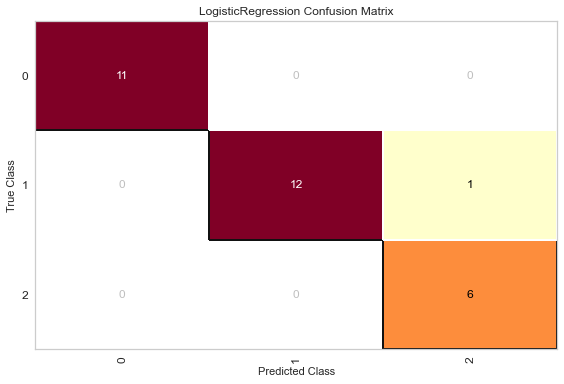

In [25]:
lr.confusion_matrix()

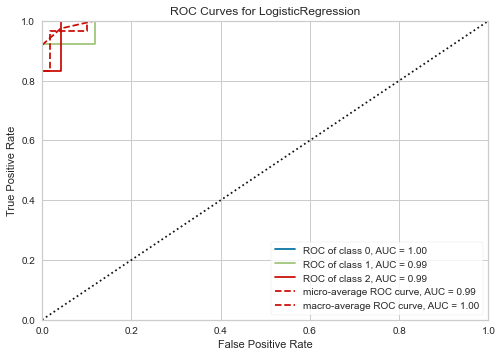

In [26]:
lr.roc_auc()

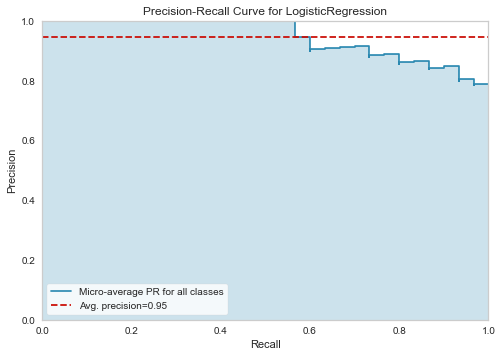

In [27]:
lr.precision_recall()

In [28]:
km = df.ml.k_means([0,1,2,3],'target',3) 
km.predict([[5.1,3.5,1.4,0.2],[6.2,2.9,4.3,1.3]])

[1, 2]

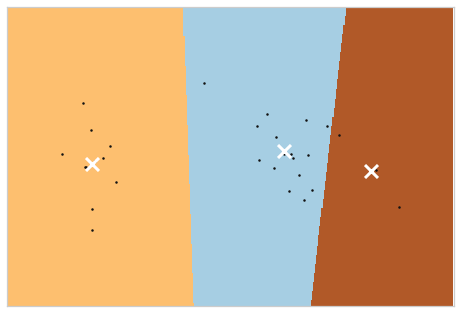

In [29]:
km.plot_clusters()

### Model evaluation

In [30]:
km.scores()

{'inertia': 139.82049635974968,
 'homogeneity_score': 0.6591265018049008,
 'completeness_score': 0.6598476779627759,
 'v_measure_score': 0.659486892724918,
 'adjusted_rand_score': 0.6201351808870379,
 'adjusted_mutual_info_score': 0.6552228479234864,
 'silhouette_score': 0.5061527484935536}

C:\Users\LuisA\AppData\Roaming\Python\Python38\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\LuisA\AppData\Roaming\Python\Python38\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


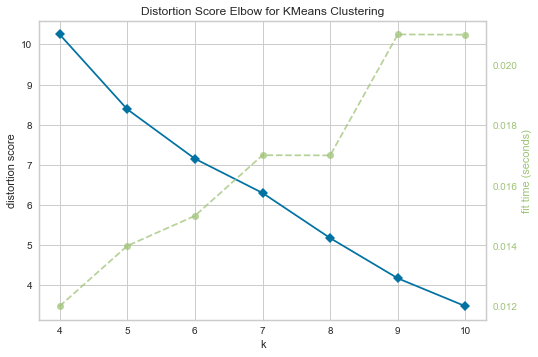

In [31]:
km.plot_elbow(4, 11)

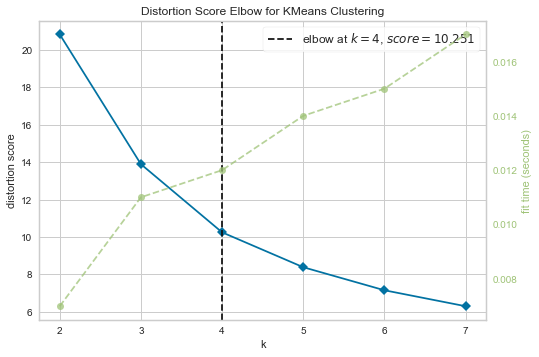

In [32]:
km.plot_elbow(2,8)

In [33]:
df.ml.pca([0,1,2,3], n_components=2)

PCA_0 1 (float64),PCA_1 2 (float64)
-2.2647028088075962,0.4800265965209898
-2.0809611519657714,-0.6741335566053538
-2.364229053890302,-0.34190802388467684
-2.299384217042708,-0.5973945076746762
-2.389842166313845,0.6468353829020266
-2.0756309481765127,1.4891775233211666
-2.4440288351341524,0.047644197630013624
-2.232847158872016,0.2231480726895914
-2.334640477907622,-1.1153276754616672
-2.1843281749339427,-0.46901356140237627


In [34]:
df.ml.pca([0,1,2,3], 'target', n_components=2)

PCA_0 1 (float64),PCA_1 2 (float64),target 3 (float64)
-2.2647028088075962,0.4800265965209898,0.0
-2.0809611519657714,-0.6741335566053538,0.0
-2.364229053890302,-0.34190802388467684,0.0
-2.299384217042708,-0.5973945076746762,0.0
-2.389842166313845,0.6468353829020266,0.0
-2.0756309481765127,1.4891775233211666,0.0
-2.4440288351341524,0.047644197630013624,0.0
-2.232847158872016,0.2231480726895914,0.0
-2.334640477907622,-1.1153276754616672,0.0
-2.1843281749339427,-0.46901356140237627,0.0


### Loading and saving models

In [35]:
lr.save('model.sav')

In [36]:
m = op.load.model('model.sav')
m

LogisticRegression(n_jobs=1, solver='liblinear')

In [37]:
m.predict([[6.3,3.3,4.7,1.6]])

array([2.])